In [1]:
import numpy as np
import pandas as pd

In [2]:
import helpers

In [3]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [4]:
mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm()

In [5]:
from sklearn.decomposition import PCA

# PCA of expression by gene

## without standardizing

In [6]:
df = mixtures_tcga_skcm.copy().T

In [7]:
print(df.iloc[:, :10].mean())
print(df.iloc[:, :10].std())

gene_symbol
A1BG        294.474654
A1CF          0.174274
A2BP1         4.678754
A2LD1       101.372201
A2M       40474.275304
A2ML1       250.924038
A4GALT      149.051454
A4GNT         0.831611
AAA1          0.009612
AAAS        966.666182
dtype: float64
gene_symbol
A1BG        238.624728
A1CF          1.005679
A2BP1        67.409798
A2LD1        64.381754
A2M       59966.359625
A2ML1      1186.783501
A4GALT      197.922130
A4GNT         1.213165
AAA1          0.064599
AAAS        378.867704
dtype: float64


In [8]:
features = list(df.columns)
pca = PCA()
components = pca.fit_transform(df)

In [9]:
labels = {str(i): f"PC {i+1}<br>({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

In [10]:
components.shape

(473, 473)

In [11]:
pca.explained_variance_[:10]

array([7.76946360e+10, 6.31547774e+10, 3.21741974e+10, 1.74921719e+10,
       1.24330018e+10, 1.19809066e+10, 1.08582930e+10, 9.77525841e+09,
       6.59564268e+09, 5.56225207e+09])

In [12]:
sum(pca.explained_variance_)

330255940150.3089

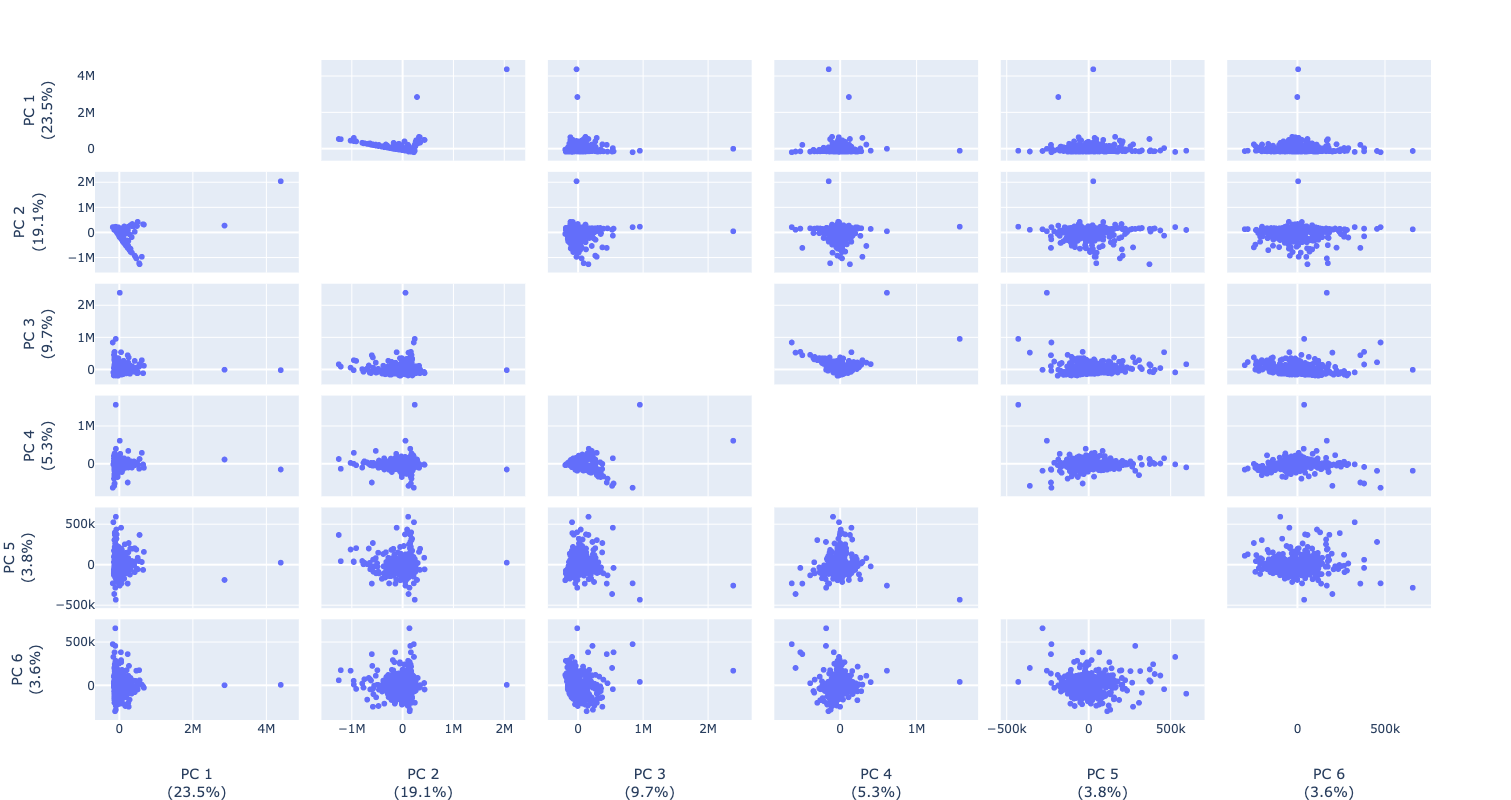

In [13]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    hover_name=df.index,
)
fig.update_traces(diagonal_visible=False)
fig.show(width=800, height=800)

## with standardizing

In [14]:
df = mixtures_tcga_skcm.copy().T

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df.values[:] = scaler.transform(df)

In [16]:
print(df.iloc[:, :10].mean())
print(df.iloc[:, :10].std())

gene_symbol
A1BG      1.093793e-15
A1CF      1.740445e-16
A2BP1     1.204698e-16
A2LD1    -2.027976e-16
A2M      -4.813509e-16
A2ML1    -1.772132e-17
A4GALT   -3.660450e-16
A4GNT     4.048911e-16
AAA1     -7.525106e-16
AAAS     -1.844425e-15
dtype: float64
gene_symbol
A1BG      1.001059
A1CF      1.001059
A2BP1     1.001059
A2LD1     1.001059
A2M       1.001059
A2ML1     1.001059
A4GALT    1.001059
A4GNT     1.001059
AAA1      1.001059
AAAS      1.001059
dtype: float64


In [17]:
features = list(df.columns)
pca = PCA()
components = pca.fit_transform(df)

In [18]:
pca.explained_variance_[:10]

array([1934.21670948,  897.74637645,  658.594083  ,  562.08251176,
        490.9594908 ,  461.66573219,  414.84759618,  284.50993259,
        266.14888369,  236.00311082])

In [19]:
sum(pca.explained_variance_)

20270.85593220343

In [20]:
labels = {str(i): f"PC {i+1}<br>({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

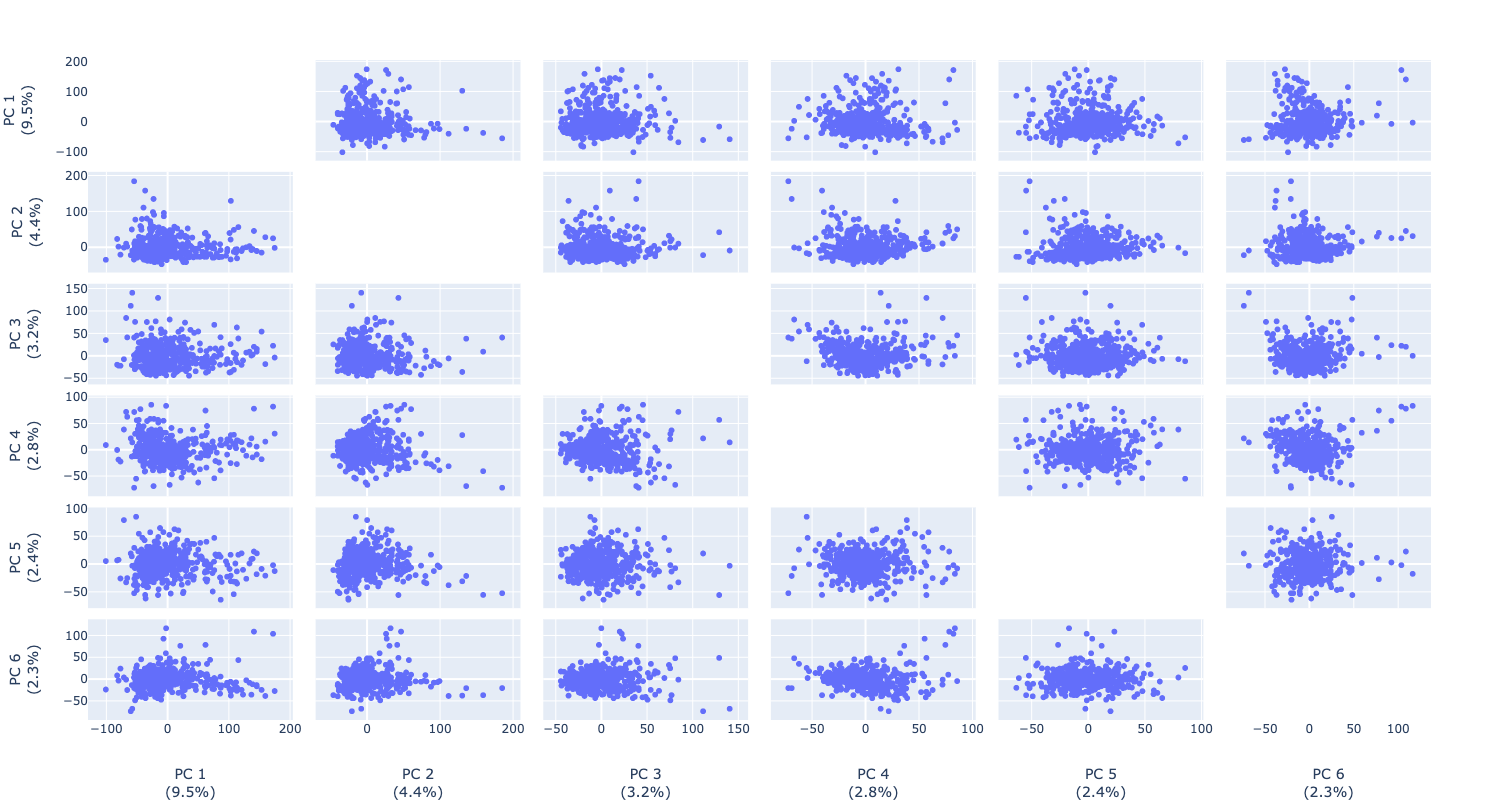

In [21]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    hover_name=df.index,
)
fig.update_traces(diagonal_visible=False)
fig.show(width=800, height=800)

In [23]:
components.shape

(473, 473)

In [30]:
pca.components_.shape, len(df.columns), len(labels)

((473, 20531), 20531, 473)

In [36]:
u = pd.DataFrame(pca.components_.T, index=df.columns, columns=labels.values())

In [43]:
(u ** 2).sum()

PC 1<br>(9.5%)      1.0
PC 2<br>(4.4%)      1.0
PC 3<br>(3.2%)      1.0
PC 4<br>(2.8%)      1.0
PC 5<br>(2.4%)      1.0
                   ... 
PC 469<br>(0.0%)    1.0
PC 470<br>(0.0%)    1.0
PC 471<br>(0.0%)    1.0
PC 472<br>(0.0%)    1.0
PC 473<br>(0.0%)    1.0
Length: 473, dtype: float64

In [45]:
u.apply(np.linalg.norm)

PC 1<br>(9.5%)      1.0
PC 2<br>(4.4%)      1.0
PC 3<br>(3.2%)      1.0
PC 4<br>(2.8%)      1.0
PC 5<br>(2.4%)      1.0
                   ... 
PC 469<br>(0.0%)    1.0
PC 470<br>(0.0%)    1.0
PC 471<br>(0.0%)    1.0
PC 472<br>(0.0%)    1.0
PC 473<br>(0.0%)    1.0
Length: 473, dtype: float64

In [39]:
u.T @ u

,PC 1<br>(9.5%),PC 2<br>(4.4%),PC 3<br>(3.2%),PC 4<br>(2.8%),PC 5<br>(2.4%),PC 6<br>(2.3%),PC 7<br>(2.0%),PC 8<br>(1.4%),PC 9<br>(1.3%),PC 10<br>(1.2%),...,PC 464<br>(0.0%),PC 465<br>(0.0%),PC 466<br>(0.0%),PC 467<br>(0.0%),PC 468<br>(0.0%),PC 469<br>(0.0%),PC 470<br>(0.0%),PC 471<br>(0.0%),PC 472<br>(0.0%),PC 473<br>(0.0%)
PC 1<br>(9.5%),1.000000e+00,-3.091874e-16,-6.071532e-17,-1.636061e-16,1.387779e-17,6.112190e-18,3.599551e-17,2.584738e-16,6.857579e-17,5.026632e-17,...,8.239937e-18,-2.634611e-17,4.119968e-18,1.517883e-17,-2.612927e-17,-7.253313e-17,-1.040834e-17,9.812030e-18,5.640562e-17,5.204170e-18
PC 2<br>(4.4%),-3.091874e-16,1.000000e+00,2.511012e-16,-5.941428e-17,-1.353084e-16,1.760744e-16,-1.571009e-16,5.746272e-17,-1.546072e-16,6.917210e-17,...,-1.160096e-17,1.604619e-17,-3.447763e-17,-7.860466e-18,1.920393e-17,-4.033232e-17,-7.372575e-18,-3.729655e-17,2.450297e-17,-1.550409e-17
PC 3<br>(3.2%),-6.071532e-17,2.511012e-16,1.000000e+00,4.987330e-17,7.684825e-16,2.801578e-16,-8.998878e-17,-2.298509e-16,-4.263625e-17,-2.169895e-16,...,-3.415237e-18,-6.613633e-18,-1.908196e-17,2.016616e-17,-2.883978e-17,-2.558717e-17,-1.512462e-17,1.621899e-17,-1.036904e-16,8.321252e-18
PC 4<br>(2.8%),-1.636061e-16,-5.941428e-17,4.987330e-17,1.000000e+00,3.642919e-17,1.118897e-16,1.813328e-17,-3.654981e-16,-5.529431e-17,-4.759648e-17,...,-5.000883e-17,-6.179952e-18,-7.372575e-17,-2.688821e-17,-2.211772e-17,-1.012645e-16,-1.366095e-17,-5.236696e-17,7.589415e-17,-2.778268e-18
PC 5<br>(2.4%),1.387779e-17,-1.353084e-16,7.684825e-16,3.642919e-17,1.000000e+00,-5.134781e-16,-1.444157e-16,6.765422e-17,3.356690e-16,2.244027e-16,...,-1.539567e-17,-3.561604e-17,1.214306e-17,-4.987330e-18,1.127570e-17,-6.722053e-17,-3.111660e-17,-4.160626e-17,4.624122e-17,-1.881091e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC 469<br>(0.0%),-7.253313e-17,-4.033232e-17,-2.558717e-17,-1.012645e-16,-6.722053e-17,5.128276e-17,3.740497e-17,8.283305e-17,-1.127570e-16,3.509562e-16,...,-2.624311e-16,-1.765081e-16,-2.108773e-16,4.185020e-17,-6.017322e-17,1.000000e+00,-3.625030e-16,1.483189e-16,3.466194e-16,-1.268517e-17
PC 470<br>(0.0%),-1.040834e-17,-7.372575e-18,-1.512462e-17,-1.366095e-17,-3.111660e-17,4.824700e-18,-4.878910e-18,-1.886512e-17,-1.156031e-17,9.757820e-18,...,-8.487270e-18,9.573505e-17,3.710140e-16,-2.927346e-17,3.351540e-17,-3.625030e-16,1.000000e+00,5.980459e-16,1.897354e-18,-1.843144e-18
PC 471<br>(0.0%),9.812030e-18,-3.729655e-17,1.621899e-17,-5.236696e-17,-4.160626e-17,-5.421011e-18,-7.047314e-18,1.588356e-17,-2.431323e-17,4.445229e-17,...,4.759648e-17,-8.142358e-17,-4.413652e-16,-5.068645e-17,7.272286e-17,1.483189e-16,5.980459e-16,1.000000e+00,1.694066e-16,-1.230569e-17
PC 472<br>(0.0%),5.640562e-17,2.450297e-17,-1.036904e-16,7.589415e-17,4.624122e-17,2.835189e-17,1.104260e-16,-7.697835e-18,-3.198396e-17,-2.564138e-16,...,-1.588085e-16,-8.955510e-17,-2.959872e-17,-1.534146e-17,-3.100818e-17,3.466194e-16,1.897354e-18,1.694066e-16,1.000000e+00,-3.609038e-17


In [48]:
# is this basically the identity matrix?

np.allclose(u.T @ u, np.eye(len(u.T)))

True

In [49]:
u

,PC 1<br>(9.5%),PC 2<br>(4.4%),PC 3<br>(3.2%),PC 4<br>(2.8%),PC 5<br>(2.4%),PC 6<br>(2.3%),PC 7<br>(2.0%),PC 8<br>(1.4%),PC 9<br>(1.3%),PC 10<br>(1.2%),...,PC 464<br>(0.0%),PC 465<br>(0.0%),PC 466<br>(0.0%),PC 467<br>(0.0%),PC 468<br>(0.0%),PC 469<br>(0.0%),PC 470<br>(0.0%),PC 471<br>(0.0%),PC 472<br>(0.0%),PC 473<br>(0.0%)
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.011914,-0.000051,0.013843,-0.010673,0.006490,0.004079,-0.006249,0.005473,0.004524,-0.002901,...,0.002303,0.000746,-0.003720,-0.003016,-0.005190,-0.006786,0.005515,-0.006744,0.001996,-0.019651
A1CF,-0.000309,0.001289,0.007387,-0.004166,0.000124,0.001142,0.001211,-0.001331,0.009333,0.009814,...,0.000836,0.002245,0.003722,0.001951,-0.002646,-0.002162,0.000341,0.000547,0.000522,0.000516
A2BP1,-0.000777,0.002214,0.009226,0.005683,-0.005807,0.005011,0.004222,0.011882,0.010112,0.004719,...,-0.000564,0.001023,-0.001913,-0.000524,-0.000905,-0.001109,-0.000843,-0.000068,-0.000464,0.023512
A2LD1,0.002277,-0.002450,0.000800,-0.004786,0.000137,0.003652,0.002767,-0.002592,0.006847,0.006755,...,-0.012488,0.001993,0.003262,0.007778,-0.003678,0.005163,0.000982,-0.019733,0.003791,-0.038406
A2M,-0.001683,0.002802,-0.005005,0.004208,0.001805,0.003158,-0.011301,-0.003224,0.001459,-0.000823,...,-0.003093,-0.001587,0.001288,0.017377,-0.000680,-0.015001,0.021593,0.006399,0.003686,0.045916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,0.006222,0.007912,0.000744,0.015038,0.011050,-0.009213,-0.007985,-0.004239,0.000795,-0.007306,...,-0.001843,-0.002008,0.005599,0.000625,0.003825,0.001475,-0.003736,-0.001238,-0.000769,0.002123
ZZEF1,0.001406,0.003296,-0.006566,0.004441,-0.016875,-0.000365,-0.000643,0.008683,-0.002643,0.002126,...,0.006984,-0.005363,0.000054,0.004724,-0.002549,0.001252,0.001986,0.000465,0.000128,0.003179
ZZZ3,-0.012826,-0.008047,-0.004055,-0.007478,-0.003742,0.001724,0.008597,0.011355,0.007806,-0.011984,...,-0.008687,-0.003703,-0.009132,-0.005583,-0.000120,-0.002201,-0.001740,0.008181,0.002664,0.003147


In [50]:
eigenvectors = pd.DataFrame(pca.components_.T, index=df.columns, columns=labels.values())

In [51]:
eigenvectors

,PC 1<br>(9.5%),PC 2<br>(4.4%),PC 3<br>(3.2%),PC 4<br>(2.8%),PC 5<br>(2.4%),PC 6<br>(2.3%),PC 7<br>(2.0%),PC 8<br>(1.4%),PC 9<br>(1.3%),PC 10<br>(1.2%),...,PC 464<br>(0.0%),PC 465<br>(0.0%),PC 466<br>(0.0%),PC 467<br>(0.0%),PC 468<br>(0.0%),PC 469<br>(0.0%),PC 470<br>(0.0%),PC 471<br>(0.0%),PC 472<br>(0.0%),PC 473<br>(0.0%)
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.011914,-0.000051,0.013843,-0.010673,0.006490,0.004079,-0.006249,0.005473,0.004524,-0.002901,...,0.002303,0.000746,-0.003720,-0.003016,-0.005190,-0.006786,0.005515,-0.006744,0.001996,-0.019651
A1CF,-0.000309,0.001289,0.007387,-0.004166,0.000124,0.001142,0.001211,-0.001331,0.009333,0.009814,...,0.000836,0.002245,0.003722,0.001951,-0.002646,-0.002162,0.000341,0.000547,0.000522,0.000516
A2BP1,-0.000777,0.002214,0.009226,0.005683,-0.005807,0.005011,0.004222,0.011882,0.010112,0.004719,...,-0.000564,0.001023,-0.001913,-0.000524,-0.000905,-0.001109,-0.000843,-0.000068,-0.000464,0.023512
A2LD1,0.002277,-0.002450,0.000800,-0.004786,0.000137,0.003652,0.002767,-0.002592,0.006847,0.006755,...,-0.012488,0.001993,0.003262,0.007778,-0.003678,0.005163,0.000982,-0.019733,0.003791,-0.038406
A2M,-0.001683,0.002802,-0.005005,0.004208,0.001805,0.003158,-0.011301,-0.003224,0.001459,-0.000823,...,-0.003093,-0.001587,0.001288,0.017377,-0.000680,-0.015001,0.021593,0.006399,0.003686,0.045916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,0.006222,0.007912,0.000744,0.015038,0.011050,-0.009213,-0.007985,-0.004239,0.000795,-0.007306,...,-0.001843,-0.002008,0.005599,0.000625,0.003825,0.001475,-0.003736,-0.001238,-0.000769,0.002123
ZZEF1,0.001406,0.003296,-0.006566,0.004441,-0.016875,-0.000365,-0.000643,0.008683,-0.002643,0.002126,...,0.006984,-0.005363,0.000054,0.004724,-0.002549,0.001252,0.001986,0.000465,0.000128,0.003179
ZZZ3,-0.012826,-0.008047,-0.004055,-0.007478,-0.003742,0.001724,0.008597,0.011355,0.007806,-0.011984,...,-0.008687,-0.003703,-0.009132,-0.005583,-0.000120,-0.002201,-0.001740,0.008181,0.002664,0.003147


In [60]:
explained_variance = pd.DataFrame(pca.explained_variance_, index=labels.values())

In [61]:
explained_variance

,0
PC 1<br>(9.5%),1.934217e+03
PC 2<br>(4.4%),8.977464e+02
PC 3<br>(3.2%),6.585941e+02
PC 4<br>(2.8%),5.620825e+02
PC 5<br>(2.4%),4.909595e+02
...,...
PC 469<br>(0.0%),5.132577e+00
PC 470<br>(0.0%),4.867555e+00
PC 471<br>(0.0%),4.828593e+00
PC 472<br>(0.0%),4.323119e+00


In [53]:
loadings = eigenvectors * np.sqrt(pca.explained_variance_)

In [56]:
loadings.apply(np.linalg.norm)

PC 1<br>(9.5%)      4.397973e+01
PC 2<br>(4.4%)      2.996242e+01
PC 3<br>(3.2%)      2.566309e+01
PC 4<br>(2.8%)      2.370828e+01
PC 5<br>(2.4%)      2.215761e+01
                        ...     
PC 469<br>(0.0%)    2.265519e+00
PC 470<br>(0.0%)    2.206254e+00
PC 471<br>(0.0%)    2.197406e+00
PC 472<br>(0.0%)    2.079211e+00
PC 473<br>(0.0%)    1.953092e-14
Length: 473, dtype: float64